# DETEKSI PERBEDAAN JENIS KURMA MENGGUNAKAN PENDEKATAN EKSTRAKSI CIRI TEKSTUR

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import os
import math
from tqdm.notebook import tqdm

Code di atas digunakan untuk mengimport beberapa library, seperti numpy, matplotlib.pyplot, cv2 (OpenCV), pandas, os, dan math. Selain itu, program juga menggunakan fungsi tqdm.notebook dari library tqdm untuk menampilkan progress bar pada iterasi.

Dalam program ini, numpy digunakan untuk melakukan operasi matematika pada array dan matriks. Library matplotlib.pyplot digunakan untuk membuat visualisasi data dalam bentuk grafik atau plot. Library cv2 (OpenCV) digunakan untuk memanipulasi dan memproses gambar, seperti membaca gambar, mengubah ukuran gambar, dan menerapkan filter. Pandas digunakan untuk melakukan manipulasi dan analisis data menggunakan struktur data seperti DataFrames. Os digunakan untuk melakukan operasi pada sistem operasi, seperti mengakses file dan direktori. Math digunakan untuk melakukan operasi matematika lainnya, seperti menghitung akar kuadrat dan fungsi trigonometri.

# INSERT GAMBAR & RESIZE

In [2]:
def insertGambar(folder):
    images = [] 
    filenames = [] 
    labels = [] 

    for label in os.listdir(folder): 
        for filename in os.listdir("kurma/"+label): 
            img = cv.imread(os.path.join("kurma/"+label,filename),255) 
            filenames.append(filename) 
            labels.append(label) 
            if img is not None: 
                scale_percent = 10
                width = int(img.shape[1] * scale_percent / 100)
                height = int(img.shape[0] * scale_percent / 100)
                dim = (width, height)
                resized = cv.resize(img, dim, interpolation=cv.INTER_AREA)
                images.append(resized) 
    return images, filenames, labels 

images, filenames, labels = insertGambar("kurma") 

Fungsi insertGambar di atas adalah fungsi yang menerima satu parameter, yaitu folder. Fungsi ini bertujuan untuk membaca gambar-gambar dalam folder yang diberikan dan mengembalikan tiga variabel, yaitu images, filenames, dan labels.

Pada awal fungsi, tiga variabel kosong images, filenames, dan labels diinisialisasi. Kemudian, fungsi melakukan iterasi melalui setiap label dalam folder yang diberikan menggunakan os.listdir(folder). Setiap label ini akan merepresentasikan sebuah subfolder di dalam folder utama.

Di dalam loop pertama, fungsi akan melakukan iterasi melalui setiap file dalam subfolder tersebut menggunakan os.listdir("kurma/"+label). Pada setiap iterasi, fungsi akan membaca gambar menggunakan fungsi cv.imread dari library OpenCV (cv). Path file gambar diperoleh dengan menggabungkan direktori subfolder dengan nama file menggunakan os.path.join("kurma/"+label, filename).

Kemudian, variabel filename dan label ditambahkan ke dalam daftar filenames dan labels masing-masing. Selanjutnya, fungsi melakukan pengecekan apakah gambar yang dibaca (img) bukan None. Hal ini dilakukan untuk memastikan bahwa gambar yang dibaca berhasil dan tidak ada kesalahan.

Jika gambar berhasil dibaca, maka dilakukan pengubahan ukuran gambar menggunakan fungsi cv.resize. Ukuran baru dari gambar dihitung berdasarkan persentase skala (scale_percent) yang ditentukan. Setelah itu, gambar diubah ukurannya menggunakan metode interpolasi cv.INTER_AREA dan disimpan dalam variabel resized. Gambar yang sudah diubah ukuran (resized) ditambahkan ke dalam daftar images.

Setelah iterasi selesai, fungsi mengembalikan tiga variabel images, filenames, dan labels sebagai hasil eksekusi fungsi insertGambar. 

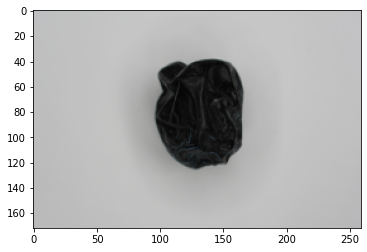

In [3]:
plt.imshow(images[1])

Baris kode plt.imshow(images[1]) digunakan untuk menampilkan gambar ke-1 dari daftar gambar (images) yang dihasilkan dari fungsi insertGambar. Fungsi plt.imshow() adalah fungsi dari library matplotlib.pyplot yang digunakan untuk menampilkan gambar atau array data dalam bentuk plot.

In [4]:
print(len(images))

450


Baris kode print(len(images)) digunakan untuk mencetak jumlah gambar yang terdapat dalam variabel images. Fungsi len() digunakan untuk menghitung jumlah elemen dalam sebuah objek atau struktur data.

Dalam hal ini, len(images) akan mengembalikan jumlah gambar yang terdapat dalam daftar images. Nilai ini kemudian dicetak menggunakan fungsi print(). Dengan mencetak panjang images, Anda akan mendapatkan informasi tentang jumlah gambar yang telah diambil dan diubah ukurannya melalui fungsi insertGambar.

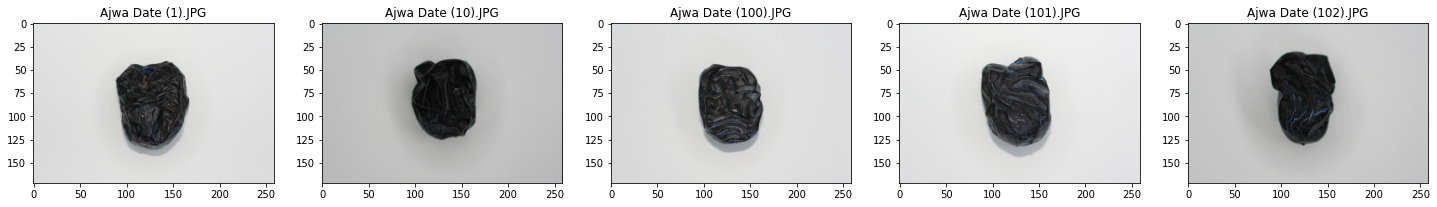

In [45]:
fig = plt.figure(figsize=(25,25))
columns = 5 
rows = 3
x = 0 
for i in range(1,6): 
    fig.add_subplot(rows, columns, i) 
    plt.title(filenames[x]) 
    plt.imshow(images[x], "gray") 
    x+=1 

Baris kode di atas digunakan untuk membuat sebuah plot dengan ukuran (figsize) 25x25 menggunakan plt.figure(). 

Selanjutnya, terdapat loop for yang berjalan dari 1 hingga 6 (range(1,6)). Di dalam loop, setiap iterasi akan menambahkan sebuah subplot ke dalam plot menggunakan fig.add_subplot(rows, columns, i). Angka i menentukan posisi subplot yang akan ditambahkan dalam grid dengan jumlah baris dan kolom yang telah ditentukan sebelumnya.

Pada setiap iterasi, diatur judul subplot menggunakan plt.title(filenames[x]), dimana filenames[x] adalah nama file yang berkaitan dengan gambar yang akan ditampilkan. Selanjutnya, gambar yang akan ditampilkan (images[x]) ditampilkan dengan warna abu-abu ("gray") menggunakan plt.imshow().

Variabel x diperbarui setiap iterasi dengan x+=1, sehingga pada setiap iterasi akan ditampilkan gambar dan judul yang berkaitan dengan indeks gambar yang sesuai.

In [6]:
savePath = "hasil/resize/"
os.makedirs(savePath, exist_ok=True)  # Membuat direktori "hasil/resize/" jika belum ada
for i in range(len(images)):
    save = os.path.join(savePath, filenames[i])
    save = os.path.splitext(save)[0] + ".jpg"  # Mengganti ekstensi gambar menjadi .jpg
    rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)  # Mengubah citra menjadi format warna RGB
    cv.imwrite(save, rgb_image)


Baris kode di atas digunakan untuk menyimpan gambar-gambar yang telah diubah ukurannya ke dalam folder "hasil/resize/". Pertama, kode ini menggunakan os.makedirs(savePath, exist_ok=True) untuk membuat direktori "hasil/resize/" jika belum ada. Jika direktori sudah ada, perintah ini akan diabaikan.

Selanjutnya, terdapat loop for yang akan berjalan sebanyak jumlah gambar (len(images)). Pada setiap iterasi, variabel save diinisialisasi dengan path lengkap file yang akan disimpan, yaitu menggunakan os.path.join(savePath, filenames[i]). filenames[i] adalah nama file dari gambar ke-i.

Kemudian, ekstensi file disesuaikan menjadi ".jpg" menggunakan os.path.splitext(save)[0] + ".jpg". Hal ini dilakukan untuk mengganti ekstensi file menjadi format JPEG.

Selanjutnya, gambar yang akan disimpan (images[i]) diubah format warnanya menjadi RGB menggunakan cv.cvtColor(images[i], cv.COLOR_BGR2RGB). Format warna asalnya adalah BGR (Blue-Green-Red) yang digunakan oleh OpenCV. Namun, umumnya format warna yang digunakan dalam pemrosesan gambar adalah RGB (Red-Green-Blue).

Terakhir, gambar yang sudah diubah format warnanya disimpan menggunakan cv.imwrite(save, rgb_image). Gambar akan disimpan dengan path dan nama file yang telah ditentukan.

Dengan kode ini, gambar-gambar yang telah diubah ukurannya akan disimpan dalam folder "hasil/resize/" dengan format file JPEG dan format warna RGB.

# ROTASI

In [7]:
def rotasi(derajat, citra):
    panjang, lebar, _ = citra.shape  # Memperoleh dimensi panjang dan lebar citra
    Rotasi_img = np.zeros(citra.shape)

    sudut = derajat * (np.pi / 180)
    tengahx = panjang / 2
    tengahy = lebar / 2

    for i in range(panjang):
        for j in range(lebar):
            x = int((i - tengahx) * np.cos(sudut) - (j - tengahy) * np.sin(sudut) + tengahx)
            y = int((i - tengahx) * np.sin(sudut) + (j - tengahy) * np.cos(sudut) + tengahy)
            if 0 <= x < panjang and 0 <= y < lebar:
                Rotasi_img[i][j] = citra[x][y]

    return Rotasi_img

Fungsi rotasi di atas adalah fungsi yang digunakan untuk melakukan rotasi pada citra/gambar. Fungsi ini menerima dua parameter, yaitu derajat dan citra, yang merupakan sudut rotasi dalam derajat dan citra yang akan dirotasi.

Pada awal fungsi, dimensi panjang dan lebar citra (panjang dan lebar) diperoleh menggunakan citra.shape. Variabel Rotasi_img diinisialisasi sebagai array kosong dengan dimensi yang sama dengan citra yang diberikan.

Selanjutnya, sudut rotasi dalam radian (sudut) dihitung dengan mengalikan sudut rotasi dalam derajat (derajat) dengan pi dibagi 180. Koordinat tengah citra (tengahx dan tengahy) dihitung sebagai setengah dari panjang dan lebar citra.

Pada loop berikutnya, dilakukan iterasi untuk setiap piksel pada citra. Pada setiap iterasi, koordinat piksel yang dirotasi (x dan y) dihitung menggunakan rumus transformasi rotasi. Koordinat piksel yang dirotasi kemudian digunakan untuk mengambil nilai piksel dari citra asli (citra[x][y]) dan disimpan pada citra hasil rotasi (Rotasi_img[i][j]). Proses ini dilakukan hanya jika koordinat piksel hasil rotasi berada dalam batas citra (0 <= x < panjang dan 0 <= y < lebar).

Setelah iterasi selesai, citra hasil rotasi (Rotasi_img) dikembalikan sebagai output dari fungsi.

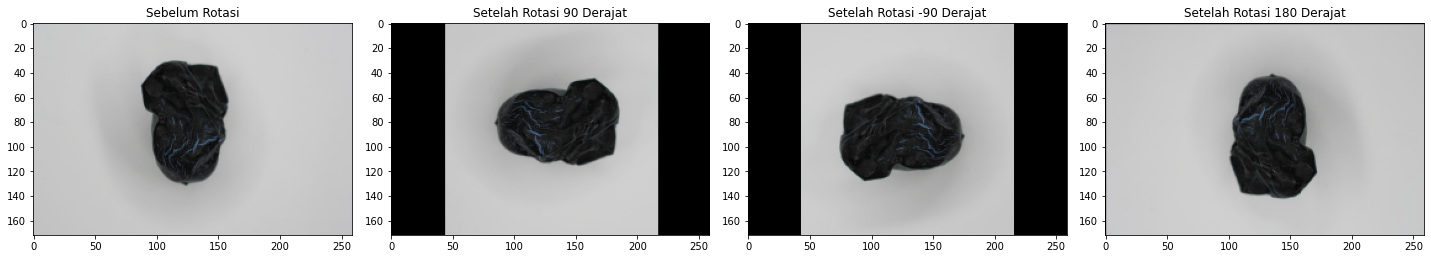

In [43]:
sudut_rotasi = [90, -90, 180]  # Sudut rotasi yang ingin ditampilkan
index_citra = 4  # Indeks citra yang ingin ditampilkan

# Mengambil citra yang dipilih
citra = images[index_citra]

plt.figure(figsize=(20,20))

# Menampilkan citra sebelum rotasi
plt.subplot(1, 4, 1)
plt.imshow(citra)
plt.title('Sebelum Rotasi')

# Menampilkan citra dengan sudut rotasi tertentu
for i, sudut in enumerate(sudut_rotasi):
    rotated_image = rotasi(sudut, citra)
    rotated_image = np.clip(rotated_image, 0, 255).astype(np.uint8)  # Memastikan rentang piksel valid [0, 255]
    plt.subplot(1, 4, i+2)
    plt.imshow(rotated_image)
    plt.title(f'Setelah Rotasi {sudut} Derajat')

plt.tight_layout()
plt.show()

Kode di atas digunakan untuk menampilkan citra sebelum dan setelah rotasi dengan sudut tertentu.

Pertama, kita mendefinisikan sudut rotasi yang ingin ditampilkan dalam list sudut_rotasi, misalnya [90, -90, 180]. Kemudian, kita juga menentukan indeks citra yang ingin ditampilkan dari daftar images menggunakan index_citra.

Selanjutnya, kita mengambil citra yang dipilih berdasarkan indeks dari images menggunakan citra = images[index_citra].

Kemudian, kita membuat sebuah plot dengan ukuran (figsize) 20x20 menggunakan plt.figure(figsize=(20,20)).

Langkah berikutnya adalah menampilkan citra sebelum rotasi. Pada subplot pertama (plt.subplot(1, 4, 1)), kita menampilkan citra asli menggunakan plt.imshow(citra) dan memberikan judul "Sebelum Rotasi".

Selanjutnya, kita melakukan iterasi melalui sudut rotasi yang telah ditentukan menggunakan for i, sudut in enumerate(sudut_rotasi):. Pada setiap iterasi, kita melakukan rotasi pada citra menggunakan fungsi rotasi(sudut, citra) dan menyimpan hasilnya dalam rotated_image. Kita juga memastikan rentang piksel hasil rotasi berada dalam rentang [0, 255] menggunakan np.clip(rotated_image, 0, 255).astype(np.uint8).

Selanjutnya, pada setiap subplot selanjutnya (plt.subplot(1, 4, i+2)), kita menampilkan citra hasil rotasi menggunakan plt.imshow(rotated_image) dan memberikan judul yang sesuai dengan sudut rotasi.

Terakhir, kita menggunakan plt.tight_layout() untuk mengatur tata letak subplot secara rapi, dan plt.show() untuk menampilkan plot secara keseluruhan.

Dengan kode tersebut, akan dihasilkan plot yang menampilkan citra asli sebelum rotasi pada subplot pertama, dan citra-citra hasil rotasi dengan sudut yang telah ditentukan pada subplot-subplot berikutnya. Setiap subplot akan memiliki judul yang sesuai dengan sudut rotasi yang digunakan.

In [9]:
savePath = "hasil/rotasi/"  # Ubah path ke folder hasil rotasi sesuai kebutuhan
sudut_rotasi = [90]  # Sudut rotasi yang ingin Anda terapkan
rotasi_data = []  # List untuk menyimpan citra hasil rotasi
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    for sudut in sudut_rotasi:
        # Menerapkan rotasi pada citra
        rgb_image = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)
        hasil_rotasi = rotasi(sudut, rgb_image)  # Menggunakan sudut rotasi dari daftar sudut_rotasi

        # Menyimpan citra hasil rotasi
        save = savePath + f"{filenames[i]}_{sudut}.jpg"  # Menambahkan sudut rotasi pada nama file
        cv.imwrite(save, hasil_rotasi)

        # Menyimpan citra hasil rotasi ke dalam list rotasi_data
        rotasi_data.append(hasil_rotasi)

Kode di atas digunakan untuk melakukan rotasi pada setiap citra dalam daftar images, menyimpan citra hasil rotasi, dan menyimpannya dalam folder yang ditentukan. Selain itu, citra hasil rotasi juga ditambahkan ke dalam list rotasi_data untuk penggunaan selanjutnya.

Pertama, kita menentukan path folder tempat citra hasil rotasi akan disimpan, yang disimpan dalam variabel savePath. Kemudian, kita menentukan sudut rotasi yang ingin diterapkan pada setiap citra dengan menyediakan nilai sudut dalam list sudut_rotasi.

Selanjutnya, kita membuat sebuah list kosong rotasi_data yang akan digunakan untuk menyimpan citra-citra hasil rotasi.

Selanjutnya, kita menggunakan os.makedirs(savePath, exist_ok=True) untuk memastikan bahwa folder tempat citra hasil rotasi akan disimpan telah dibuat. Jika folder sudah ada, perintah ini akan diabaikan.

Selanjutnya, dilakukan nested loop untuk iterasi melalui setiap citra dalam daftar images dan setiap sudut rotasi dalam sudut_rotasi. Pada setiap iterasi, citra diubah format warnanya menjadi RGB menggunakan cv.cvtColor(images[i], cv.COLOR_BGR2RGB).

Kemudian, dilakukan rotasi pada citra menggunakan fungsi rotasi(sudut, rgb_image), dan hasil rotasinya disimpan dalam variabel hasil_rotasi.

Selanjutnya, dibentuk path lengkap untuk menyimpan citra hasil rotasi dengan menambahkan sudut rotasi pada nama file, dan ekstensi file yang ditentukan sebagai .jpg. Citra hasil rotasi kemudian disimpan dalam folder yang ditentukan menggunakan cv.imwrite(save, hasil_rotasi).

Selain itu, citra hasil rotasi juga ditambahkan ke dalam list rotasi_data menggunakan rotasi_data.append(hasil_rotasi). Hal ini dilakukan untuk menyimpan semua citra hasil rotasi yang akan digunakan dalam proses selanjutnya jika diperlukan.

# TRESHOLDING

In [10]:
tresh = list()
for i in range (len(images)):
    ret,thresh1 = cv.threshold(images[i],127,255,cv.THRESH_BINARY)
    tresh.append(thresh1)

Kode di atas digunakan untuk melakukan thresholding pada setiap citra dalam daftar images. 

Pertama, kita membuat sebuah list kosong tresh yang akan digunakan untuk menyimpan citra-citra hasil thresholding.

Selanjutnya, dilakukan loop for untuk iterasi melalui setiap citra dalam daftar images. Pada setiap iterasi, kita menggunakan cv.threshold untuk melakukan thresholding pada citra dengan menggunakan ambang batas 127. Citra hasil thresholding disimpan dalam variabel thresh1, sedangkan nilai ambang batas yang digunakan dan hasil return dari fungsi cv.threshold disimpan dalam variabel ret.

Kemudian, citra hasil thresholding ditambahkan ke dalam list tresh menggunakan tresh.append(thresh1). Dengan demikian, setiap elemen dalam list tresh akan berisi citra hasil thresholding yang sesuai dengan citra asli dalam daftar images.

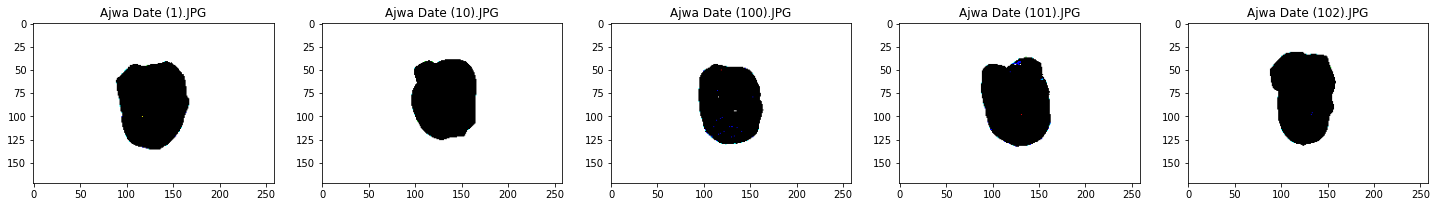

In [44]:
fig = plt.figure(figsize=(25,25))
columns = 5 
rows = 3
x = 0 
for i in range(1,6): 
    fig.add_subplot(rows, columns, i) 
    plt.title(filenames[x]) 
    plt.imshow(tresh[x], "gray") 
    x+=1 

Kode di atas digunakan untuk menampilkan citra-citra hasil thresholding dalam grid dengan ukuran dan jumlah kolom dan baris yang ditentukan.

Pertama, kita membuat sebuah figure menggunakan fig = plt.figure(figsize=(25,25)) dengan ukuran gambar yang diinginkan.

Selanjutnya, dilakukan loop for untuk iterasi dari 1 hingga 5 (inklusif), yang akan menghasilkan 5 subplots. Pada setiap iterasi, kita menggunakan fig.add_subplot(rows, columns, i) untuk menambahkan subplot ke dalam figure. Nomor subplot ditentukan oleh variabel i, sedangkan rows dan columns menentukan tata letak grid.

Di dalam loop, kita menentukan judul subplot menggunakan plt.title(filenames[x]), di mana filenames[x] adalah nama file dari citra yang sesuai dengan indeks x. Kemudian, kita menampilkan citra hasil thresholding dalam subplot menggunakan plt.imshow(tresh[x], "gray"). Citra ditampilkan dalam skala abu-abu (grayscale) dengan menggunakan argumen "gray".

Terakhir, kita meningkatkan nilai x setelah setiap iterasi untuk memastikan bahwa kita mengakses citra dan judul yang tepat dari daftar tresh dan filenames.

In [12]:
savePath = "hasil/treshold/"
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    # Menerapkan tresholding pada citra menggunakan metode BINARY
    ret, treshold = cv.threshold(images[i], 127, 255, cv.THRESH_BINARY)

    # Menyimpan citra hasil tresholding
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, treshold)


Kode di atas digunakan untuk menyimpan citra-citra hasil thresholding ke dalam folder yang ditentukan.

Pertama, kita menentukan path folder tempat citra hasil thresholding akan disimpan, yang disimpan dalam variabel savePath. Kemudian, kita menggunakan os.makedirs(savePath, exist_ok=True) untuk memastikan bahwa folder tempat citra hasil thresholding akan disimpan telah dibuat. Jika folder sudah ada, perintah ini akan diabaikan.

Selanjutnya, dilakukan loop for untuk iterasi melalui setiap citra dalam daftar images. Pada setiap iterasi, kita menggunakan cv.threshold untuk melakukan thresholding pada citra dengan menggunakan ambang batas 127 dan metode thresholding BINARY (cv.THRESH_BINARY). Hasil thresholding disimpan dalam variabel treshold, sedangkan nilai ambang batas yang digunakan dan hasil return dari fungsi cv.threshold disimpan dalam variabel ret.

Kemudian, dibentuk path lengkap untuk menyimpan citra hasil thresholding dengan menambahkan nama file dan ekstensi .jpg. Citra hasil thresholding kemudian disimpan dalam folder yang ditentukan menggunakan cv.imwrite(save, treshold).

# EDGE DETECTION

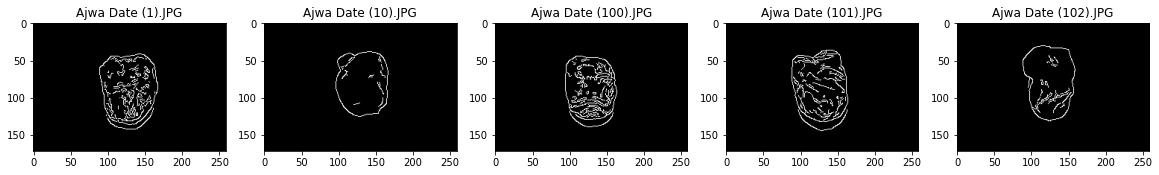

In [13]:
edges = []
for i in range(len(images)):
    gray_image = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)  # Ubah citra menjadi grayscale
    edges_image = cv.Canny(gray_image, 100, 200)  # Lakukan edge detection pada citra grayscale
    edges.append(edges_image)

fig = plt.figure(figsize=(20, 20))
columns = 5
rows = 3
x = 0
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    plt.title(filenames[x])
    plt.imshow(edges[x], cmap="gray")
    x += 1

plt.show()


Kode di atas digunakan untuk melakukan deteksi tepi (edge detection) pada setiap citra dalam daftar images menggunakan metode Canny, dan menampilkan citra-citra hasil deteksi tepi dalam grid.

Pertama, kita membuat sebuah list kosong edges yang akan digunakan untuk menyimpan citra-citra hasil deteksi tepi.

Selanjutnya, dilakukan loop for untuk iterasi melalui setiap citra dalam daftar images. Pada setiap iterasi, kita mengubah citra menjadi grayscale menggunakan cv.cvtColor(images[i], cv.COLOR_BGR2GRAY), sehingga kita mendapatkan citra grayscale.

Kemudian, kita melakukan deteksi tepi pada citra grayscale menggunakan metode Canny dengan menggunakan cv.Canny(gray_image, 100, 200). Hasil deteksi tepi disimpan dalam variabel edges_image.

Setelah itu, citra hasil deteksi tepi ditambahkan ke dalam list edges menggunakan edges.append(edges_image).

Selanjutnya, kita membuat sebuah figure menggunakan fig = plt.figure(figsize=(20, 20)) dengan ukuran gambar yang diinginkan.

Kemudian, kita menentukan jumlah kolom dan baris dalam grid menggunakan columns = 5 dan rows = 3. Ini akan membagi grid menjadi 15 subplots, di mana setiap subplot akan menampilkan satu citra hasil deteksi tepi.

Selanjutnya, dilakukan loop for untuk iterasi dari 1 hingga 5 (inklusif), yang akan menghasilkan 5 subplots. Pada setiap iterasi, kita menggunakan fig.add_subplot(rows, columns, i) untuk menambahkan subplot ke dalam figure. Nomor subplot ditentukan oleh variabel i, sedangkan rows dan columns menentukan tata letak grid.

Di dalam loop, kita menentukan judul subplot menggunakan plt.title(filenames[x]), di mana filenames[x] adalah nama file dari citra yang sesuai dengan indeks x. Kemudian, kita menampilkan citra hasil deteksi tepi dalam subplot menggunakan plt.imshow(edges[x], cmap="gray"). Citra ditampilkan dalam skala abu-abu (grayscale) menggunakan argumen cmap="gray".

Terakhir, kita meningkatkan nilai x setelah setiap iterasi untuk memastikan bahwa kita mengakses citra dan judul yang tepat dari daftar edges dan filenames.

In [14]:
savePath = "hasil/edges/"
os.makedirs(savePath, exist_ok=True)
for i in range(len(images)):
    gray_image = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)  # Ubah citra menjadi grayscale
    edges_image = cv.Canny(gray_image, 100, 200)  # Lakukan edge detection pada citra grayscale

    # Menyimpan citra hasil edge detection
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, edges_image)


Kode di atas digunakan untuk menyimpan citra-citra hasil deteksi tepi ke dalam folder yang ditentukan.

Pertama, kita menentukan path folder tempat citra-citra hasil deteksi tepi akan disimpan, yang disimpan dalam variabel savePath. Kemudian, kita menggunakan os.makedirs(savePath, exist_ok=True) untuk memastikan bahwa folder tempat citra-citra hasil deteksi tepi akan disimpan telah dibuat. Jika folder sudah ada, perintah ini akan diabaikan.

Selanjutnya, dilakukan loop for untuk iterasi melalui setiap citra dalam daftar images. Pada setiap iterasi, kita mengubah citra menjadi grayscale menggunakan cv.cvtColor(images[i], cv.COLOR_BGR2GRAY), sehingga kita mendapatkan citra grayscale.

Kemudian, kita melakukan deteksi tepi pada citra grayscale menggunakan metode Canny dengan menggunakan cv.Canny(gray_image, 100, 200). Hasil deteksi tepi disimpan dalam variabel edges_image.

Selanjutnya, dibentuk path lengkap untuk menyimpan citra hasil deteksi tepi dengan menambahkan nama file dan ekstensi .jpg. Citra hasil deteksi tepi kemudian disimpan dalam folder yang ditentukan menggunakan cv.imwrite(save, edges_image).

# SEGMENTASI

In [15]:
masked = []
segmented = []
for i in range (len(edges)):
    cnt = sorted(cv.findContours(edges[i], cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2], key=cv.contourArea)[-1]
    mask = np.zeros(images[i].shape[0:2], dtype='uint8')
    masked.append(cv.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv.bitwise_and(images[i], images[i], mask=mask)
    segmented.append(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

Kode di atas digunakan untuk melakukan segmentasi objek pada citra-citra hasil deteksi tepi menggunakan metode kontur.

Pertama, kita membuat dua list kosong, yaitu masked dan segmented, yang akan digunakan untuk menyimpan citra-citra hasil masking dan segmentasi.

Selanjutnya, dilakukan loop for untuk iterasi melalui setiap citra dalam daftar edges. Pada setiap iterasi, kita mencari kontur pada citra hasil deteksi tepi menggunakan cv.findContours(edges[i], cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)[-2]. Hasilnya merupakan daftar kontur yang ditemukan pada citra tersebut. Kontur-kontur tersebut diurutkan berdasarkan luas area menggunakan sorted(..., key=cv.contourArea) dan kita mengambil kontur dengan luas area terbesar ([-1]).

Kemudian, kita membuat citra mask dengan ukuran yang sama dengan citra asli menggunakan np.zeros(images[i].shape[0:2], dtype='uint8'). Citra mask awalnya berisi piksel-piksel dengan intensitas nol (hitam).

Selanjutnya, kita menggunakan cv.drawContours(mask, [cnt], -1, 255, -1) untuk menggambar kontur yang terdeteksi pada citra mask. Argumen [cnt] adalah daftar kontur yang akan digambar, dan argumen -1 mengindikasikan bahwa semua kontur dalam daftar tersebut akan digambar. Intensitas piksel yang digunakan untuk menggambar kontur adalah 255 (putih), dan argumen terakhir -1 mengindikasikan bahwa kontur akan diisi (masking).

Setelah itu, kita melakukan operasi bitwise AND antara citra asli (images[i]) dan citra mask (mask) menggunakan cv.bitwise_and(images[i], images[i], mask=mask). Hasilnya adalah citra yang hanya mempertahankan piksel-piksel yang berada di dalam kontur dan mengabaikan piksel-piksel di luar kontur.

Terakhir, kita mengubah citra hasil masking ke format warna RGB menggunakan cv.cvtColor(dst, cv.COLOR_BGR2RGB) dan menyimpannya dalam list segmented.

Selama proses iterasi, citra-citra hasil masking dan segmentasi akan disimpan dalam list masked dan segmented sesuai dengan indeks yang sesuai dengan citra asli yang terkait.

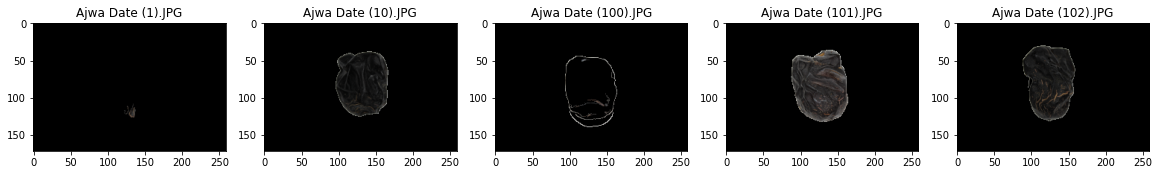

In [16]:
fig = plt.figure(figsize=(20, 20))
columns = 5
rows = 3
x = 0
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    plt.title(filenames[x])
    plt.imshow(segmented[x], "gray")
    x += 1

plt.show()


Kode di atas digunakan untuk menampilkan citra-citra hasil segmentasi dalam bentuk grid plot.

Pertama, kita membuat sebuah figure dengan ukuran (20, 20) menggunakan fig = plt.figure(figsize=(20, 20)). Kemudian, kita menentukan jumlah kolom dan baris dalam grid plot menggunakan columns = 5 dan rows = 3.

Selanjutnya, dilakukan loop for untuk iterasi dari 1 hingga 5 (inklusif) menggunakan range(1, 6). Pada setiap iterasi, kita menambahkan sebuah subplot ke dalam figure menggunakan fig.add_subplot(rows, columns, i).

Di dalam setiap subplot, kita menampilkan judul citra yang sesuai menggunakan plt.title(filenames[x]), dan menampilkan citra hasil segmentasi dalam bentuk grayscale menggunakan plt.imshow(segmented[x], "gray").

Variabel x digunakan sebagai indeks untuk mengakses citra-citra dalam list segmented. Setelah menampilkan citra pada subplot, kita meningkatkan nilai x agar pada iterasi selanjutnya dapat mengakses citra berikutnya dalam list segmented.

Terakhir, kita menampilkan grid plot dengan menggunakan plt.show().

In [17]:
savePath = "hasil/segmentasi/"
os.makedirs(savePath, exist_ok=True)
for i in range(len(segmented)):
    save = savePath + filenames[i] + ".jpg"
    cv.imwrite(save, segmented[i])


Kode di atas digunakan untuk menyimpan citra-citra hasil segmentasi ke dalam folder yang ditentukan.

Pertama, kita menentukan path folder tempat citra-citra hasil segmentasi akan disimpan, yang disimpan dalam variabel savePath. Kemudian, kita menggunakan os.makedirs(savePath, exist_ok=True) untuk memastikan bahwa folder tempat citra-citra hasil segmentasi akan disimpan telah dibuat. Jika folder sudah ada, perintah ini akan diabaikan.

Selanjutnya, dilakukan loop for untuk iterasi melalui setiap citra dalam daftar segmented. Pada setiap iterasi, kita membentuk path lengkap untuk menyimpan citra hasil segmentasi dengan menambahkan nama file dan ekstensi .jpg. Citra hasil segmentasi kemudian disimpan dalam folder yang ditentukan menggunakan cv.imwrite(save, segmented[i]).

Dengan menjalankan kode tersebut, citra-citra hasil segmentasi akan disimpan dalam folder yang ditentukan dengan nama file yang sesuai. Setiap citra hasil segmentasi akan memiliki nama file yang sama dengan citra asli yang terkait, tetapi dengan tambahan ekstensi .jpg.

# EKSTRAKSI CIRI TEKSTUR

In [30]:
def calculate_glcm(image):
    # Mengubah citra menjadi grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Menghitung matriks GLCM dengan jarak 1 pixel dan sudut 0 derajat
    glcm = np.zeros((256, 256), dtype=np.float64)
    height, width = gray_image.shape
    for i in range(height):
        for j in range(width - 1):
            glcm[gray_image[i, j], gray_image[i, j + 1]] += 1

    # Normalisasi matriks GLCM
    glcm /= glcm.sum()

    return glcm

Fungsi calculate_glcm(image) di atas digunakan untuk menghitung dan menghasilkan matriks Co-Occurrence Gray Level (GLCM) dari citra yang diberikan.

Pertama, citra masukan diubah menjadi citra grayscale menggunakan cv.cvtColor(image, cv.COLOR_BGR2GRAY). Hal ini dilakukan untuk memastikan bahwa citra yang digunakan dalam perhitungan GLCM memiliki tingkat keabuan (gray level) tunggal untuk setiap piksel.

Selanjutnya, matriks GLCM dengan ukuran 256x256 (sesuai dengan tingkat keabuan yang mungkin) dibuat dengan inisialisasi semua elemennya menjadi nol menggunakan glcm = np.zeros((256, 256), dtype=np.float64).

Kemudian, dilakukan loop nested for untuk iterasi melalui setiap piksel pada citra grayscale. Pada setiap iterasi, nilai piksel saat ini (gray_image[i, j]) dan nilai piksel sebelah kanannya (gray_image[i, j + 1]) digunakan sebagai indeks untuk meningkatkan nilai elemen matriks GLCM yang sesuai. Ini dilakukan dengan glcm[gray_image[i, j], gray_image[i, j + 1]] += 1.

Setelah proses perhitungan matriks GLCM selesai, matriks tersebut dinormalisasi dengan membagi setiap elemennya dengan jumlah total elemen dalam matriks GLCM menggunakan glcm /= glcm.sum(). Hal ini dilakukan untuk menghasilkan matriks GLCM yang memiliki nilai probabilitas untuk setiap kombinasi tingkat keabuan.

Terakhir, matriks GLCM hasil perhitungan dikembalikan sebagai output dari fungsi.

In [31]:
def calculate_contrast(glcm):
    # Menghitung kontras berdasarkan matriks GLCM
    contrast = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            contrast += ((i - j) ** 2) * glcm[i, j]

    return contrast

Fungsi calculate_contrast(glcm) di atas digunakan untuk menghitung nilai kontras (contrast) berdasarkan matriks Co-Occurrence Gray Level (GLCM) yang diberikan.

Pertama, fungsi ini mengambil matriks GLCM sebagai masukan (glcm). Matriks GLCM diasumsikan memiliki ukuran rows x cols.

Selanjutnya, dilakukan loop nested for untuk iterasi melalui setiap elemen dalam matriks GLCM. Pada setiap iterasi, perbedaan kuadrat antara indeks baris (i) dan indeks kolom (j) digunakan sebagai faktor pembobot. Faktor pembobot ini digunakan untuk mengalikan nilai elemen matriks GLCM (glcm[i, j]). Hasil dari perkalian ini ditambahkan ke variabel contrast.

Setelah proses perhitungan kontras selesai, nilai kontras tersebut dikembalikan sebagai output dari fungsi.

In [32]:
def calculate_homogeneity(glcm):
    # Menghitung homogenitas berdasarkan matriks GLCM
    homogeneity = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            homogeneity += glcm[i, j] / (1 + abs(i - j))

    return homogeneity

Fungsi calculate_homogeneity(glcm) di atas digunakan untuk menghitung nilai homogenitas (homogeneity) berdasarkan matriks Co-Occurrence Gray Level (GLCM) yang diberikan.

Pertama, fungsi ini mengambil matriks GLCM sebagai masukan (glcm). Matriks GLCM diasumsikan memiliki ukuran rows x cols.

Selanjutnya, dilakukan loop nested for untuk iterasi melalui setiap elemen dalam matriks GLCM. Pada setiap iterasi, nilai elemen matriks GLCM (glcm[i, j]) dibagi dengan penjumlahan absolut dari perbedaan antara indeks baris (i) dan indeks kolom (j) ditambah 1. Hasil dari pembagian ini ditambahkan ke variabel homogeneity.

Setelah proses perhitungan homogenitas selesai, nilai homogenitas tersebut dikembalikan sebagai output dari fungsi.

In [33]:
def calculate_entropy(glcm):
    # Menghitung entropi berdasarkan matriks GLCM
    entropy = 0
    rows, cols = glcm.shape
    for i in range(rows):
        for j in range(cols):
            if glcm[i, j] > 0:
                entropy += glcm[i, j] * math.log2(glcm[i, j])

    return -entropy

Fungsi calculate_entropy(glcm) di atas digunakan untuk menghitung nilai entropi (entropy) berdasarkan matriks Co-Occurrence Gray Level (GLCM) yang diberikan.

Pertama, fungsi ini mengambil matriks GLCM sebagai masukan (glcm). Matriks GLCM diasumsikan memiliki ukuran rows x cols.

Selanjutnya, dilakukan loop nested for untuk iterasi melalui setiap elemen dalam matriks GLCM. Pada setiap iterasi, dilakukan pengecekan apakah nilai elemen matriks GLCM (glcm[i, j]) lebih besar dari 0. Jika iya, maka nilai elemen tersebut digunakan dalam perhitungan entropi.

Perhitungan entropi dilakukan dengan mengalikan nilai elemen GLCM dengan logaritma basis 2 dari nilai elemen tersebut, kemudian hasil perkalian tersebut ditambahkan ke variabel entropy.

Setelah proses perhitungan entropi selesai, nilai entropi dikalikan dengan -1 (untuk mengubah tanda) dan dikembalikan sebagai output dari fungsi.

In [34]:
# Ekstraksi ciri tekstur untuk setiap citra
contrast_values = []
homogeneity_values = []
entropy_values = []
for i in range(len(images)):
    glcm = calculate_glcm(images[i])
    contrast = calculate_contrast(glcm)
    homogeneity = calculate_homogeneity(glcm)
    entropy = calculate_entropy(glcm)
    contrast_values.append(contrast)
    homogeneity_values.append(homogeneity)
    entropy_values.append(entropy)

# Menampilkan hasil ekstraksi ciri tekstur
data = {'Filename': filenames, 'Contrast': contrast_values, 'Homogeneity': homogeneity_values, 'Entropy': entropy_values}
df = pd.DataFrame(data)
print(df)

                  Filename   Contrast  Homogeneity   Entropy
0        Ajwa Date (1).JPG  68.811745     0.748254  6.909555
1       Ajwa Date (10).JPG  35.969713     0.780552  6.542512
2      Ajwa Date (100).JPG  65.041757     0.751429  6.207866
3      Ajwa Date (101).JPG  62.326010     0.758942  7.057498
4      Ajwa Date (102).JPG  51.366054     0.765831  6.957812
..                     ...        ...          ...       ...
445  Meneifi Date (95).JPG  50.589830     0.726679  7.409446
446  Meneifi Date (96).JPG  61.312637     0.719514  7.507049
447  Meneifi Date (97).JPG  64.283448     0.722952  7.392406
448  Meneifi Date (98).JPG  82.981337     0.720526  7.265707
449  Meneifi Date (99).JPG  57.680498     0.732593  7.438577

[450 rows x 4 columns]


Pada kode di atas dilakukan ekstraksi ciri tekstur untuk setiap citra menggunakan metode Co-Occurrence Gray Level (GLCM). Metode ini memanfaatkan matriks GLCM untuk menggambarkan distribusi spasial dari intensitas piksel pada citra.

Langkah pertama dalam ekstraksi ciri tekstur adalah mengiterasi melalui setiap citra dalam list images. Untuk setiap citra, dilakukan perhitungan matriks GLCM dengan memanggil fungsi calculate_glcm(images[i]). Matriks GLCM ini merepresentasikan kemunculan pasangan intensitas piksel yang berdekatan dalam citra.

Selanjutnya, dari matriks GLCM yang telah dihitung, dilakukan perhitungan tiga ciri tekstur utama, yaitu kontras, homogenitas, dan entropi. Kontras menggambarkan perbedaan intensitas piksel yang berdekatan dalam citra. Homogenitas mencerminkan sejauh mana distribusi intensitas piksel dalam citra cenderung seragam atau homogen. Sedangkan entropi menggambarkan tingkat keacakan atau ketidakteraturan dalam distribusi intensitas piksel.

Hasil perhitungan kontras, homogenitas, dan entropi untuk setiap citra disimpan dalam list contrast_values, homogeneity_values, dan entropy_values. Setelah proses ekstraksi selesai, data ini diorganisir dalam DataFrame df, yang memiliki kolom 'Filename' untuk menyimpan nama file citra, 'Contrast' untuk nilai kontras, 'Homogeneity' untuk nilai homogenitas, dan 'Entropy' untuk nilai entropi.

Terakhir, DataFrame df dicetak untuk menampilkan hasil ekstraksi ciri tekstur dalam bentuk tabel, yang memudahkan dalam menganalisis dan membandingkan ciri tekstur antar citra.

In [39]:
# Contoh data hasil ekstraksi ciri tekstur
data = [
    {
        'Filename': 'Ajwa Date (1).JPG',
        'Label': 'Ajwa',
        'Contrast': 68.811745,
        'Homogeneity': 0.748254,
        'Entropy': 6.909555
    },
    {
        'Filename': 'Meneifi Date (1).JPG',
        'Label': 'Meneifi',
        'Contrast': 42.937681,
        'Homogeneity': 0.813627,
        'Entropy': 7.056412
    },
    
]

# Simpan hasil ekstraksi ke dalam DataFrame
df = pd.DataFrame(data)

# Simpan DataFrame ke dalam file CSV
df.to_csv('hasil_ekstraksi.csv', index=False)

Kode digunakan untuk menyimpan contoh data hasil ekstraksi ciri tekstur. Dalam contoh yang diberikan, ditunjukkan bagaimana menyimpan hasil ekstraksi ciri tekstur ke dalam DataFrame dan kemudian menyimpan DataFrame tersebut ke dalam file CSV.

Data hasil ekstraksi ciri tekstur ditampilkan dalam bentuk list data. Setiap elemen dalam list data mewakili satu citra dan memiliki informasi seperti 'Filename' (nama file citra), 'Label' (label atau kategori citra, jika ada), 'Contrast' (nilai kontras), 'Homogeneity' (nilai homogenitas), dan 'Entropy' (nilai entropi). Nilai-nilai tersebut adalah contoh semata dan dapat disesuaikan dengan hasil ekstraksi yang sebenarnya.

Selanjutnya, list data digunakan untuk membuat DataFrame df menggunakan fungsi pd.DataFrame(data). DataFrame ini memiliki kolom-kolom yang sesuai dengan informasi dalam list data.

Terakhir, DataFrame df disimpan ke dalam file CSV menggunakan metode to_csv(). Nama file yang digunakan dalam contoh ini adalah 'hasil_ekstraksi.csv'. Dengan menggunakan argumen index=False, indeks baris dalam DataFrame tidak akan disertakan dalam file CSV yang dihasilkan.

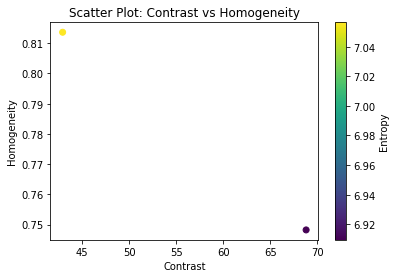

In [40]:
# Membaca data dari file hasil ekstraksi ciri tekstur
data = pd.read_csv('hasil_ekstraksi.csv')

# Visualisasi scatter plot
plt.scatter(data['Contrast'], data['Homogeneity'], c=data['Entropy'], cmap='viridis')
plt.colorbar(label='Entropy')
plt.xlabel('Contrast')
plt.ylabel('Homogeneity')
plt.title('Scatter Plot: Contrast vs Homogeneity')
plt.show()

Dalam kode di atas, pertama-tama, data hasil ekstraksi ciri tekstur dibaca dari file CSV menggunakan fungsi pd.read_csv('hasil_ekstraksi.csv'). Data tersebut disimpan dalam variabel data, yang merupakan sebuah DataFrame.

Selanjutnya, dilakukan visualisasi scatter plot dengan menggunakan plt.scatter(). Pada scatter plot ini, sumbu x menunjukkan nilai kontras (Contrast), sumbu y menunjukkan nilai homogenitas (Homogeneity), dan warna titik-titik scatter plot ditentukan oleh nilai entropi (Entropy). Pengaturan warna dilakukan dengan menggunakan argumen c=data['Entropy'] yang menunjukkan bahwa nilai entropi digunakan sebagai basis warna untuk scatter plot.

Fungsi plt.colorbar(label='Entropy') digunakan untuk menampilkan colorbar dengan label "Entropy" yang memberikan informasi tentang rentang nilai entropi yang ditunjukkan oleh warna pada scatter plot.

Selanjutnya, dilakukan pengaturan label sumbu x dan sumbu y menggunakan plt.xlabel('Contrast') dan plt.ylabel('Homogeneity'). Judul scatter plot ditetapkan dengan plt.title('Scatter Plot: Contrast vs Homogeneity').

Terakhir, plot scatter ditampilkan dengan plt.show() untuk melihat visualisasi scatter plot dari data ekstraksi ciri tekstur.

# EKSTRAKSI FITUR GLCM

In [18]:
class Glcm:
    def __init__(self) :
        pass
    
    def derajat_0 (self, img): 
        max = np.max(img) 
        temp = np.zeros([max+1,max+1]) 
        for i in range (len(img)):
            for j in range(len(img[i])-1):
                temp[img[i,j],img[i,j+1]] +=1 
                
        transpose = np.transpose(temp) 
        data = temp+transpose 
        tmp = 0
        
        for i in range (len(data)):
            for j in range(len(data)):
                tmp+=data[i,j]
                
        for i in range(len(data)):
            for j in range(len(data)):
                data[i,j]/=tmp
        return data
    
    def derajat_45 (self, img): 
        max = np.max(img) 
        temp=np.zeros([max+1,max+1])
        for i in range (len (img)-1):
            for j in range (len (img[i])-1):
                temp[img[i+1,j],img[i,j+1]] += 1 
                
        transpose = np.transpose(temp) 
        data= temp+transpose 
        tmp=0
       
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j] 
                
        for i in range (len (data)):
            for j in range (len (data)):
                data[i,j]/=tmp 
        return data 
    
    def derajat_90 (self, img): 
        max = np.max(img) 
        temp=np.zeros([max+1,max+1]) 
        for i in range (len (img)-1):
            for j in range (len (img[i])):
                temp[img[i+1,j],img[i,j]] += 1 
                
        transpose= np.transpose(temp) 
        data= temp+transpose 
        tmp=0
       
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j] 
                
        for i in range (len (data)):
            for j in range (len (data)):
                data[i,j]/=tmp 
        return data 
    
    def derajat_135 (self, img): 
        max = np.max(img) 
        imgTemp=np.zeros([max+1,max+1]) 
        for i in range (len (img)-1):
            for j in range (len (img[i])-1):
                imgTemp[img[i,j],img[i+1,j+1]] += 1 
                
        transpose= np.transpose(imgTemp) 
        data= imgTemp+transpose 
        tmp=0
       
        for i in range (len(data)):
            for j in range (len(data)):
                tmp+=data[i,j] 
                
        for i in range (len (data)):
            for j in range (len (data)):
                data[i,j]/=tmp 
        return data 

    def dissimilarity( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= data[i,j]+abs(i-j) 
        return simpan 
    
    def ASM( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= pow(data[i,j],2) 
        return simpan 
    
    def contrast( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= data[i,j]+pow(i-j,2) 
        return simpan 
    
    def entropi( data): 
        simpan = 0 
        for i in range(len(data)): 
            for j in range(len(data)):
                if data[i,j] > 0:
                    simpan+= -(data[i,j] * math.log(data[i,j])) 
        return simpan 
    
    def energy( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+=pow(data[i,j],2)
        return simpan 
    
    def homogenitas(data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+=data[i,j]/(1+abs(i-j))
        return simpan 
    
    def correlation(data,mI,mJ,tI,tJ): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
        return simpan 
    
    def meanI( data): 
        simpan = 0
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= i * data[i,j] 
        return simpan 
    
    def meanJ( data): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= j * data[i,j] 
        return simpan 
    
    def taoI( data,mI):
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= pow((i-mI),2)*data[i,j] 
        simpan = math.sqrt(simpan) 
        return simpan 
    
    def taoJ( data,mJ): 
        simpan = 0 
        for i in range (len(data)): 
            for j in range(len(data)):
                simpan+= pow((j-mJ),2)*data[i,j] 
        simpan = math.sqrt(simpan) 
        return simpan 


Kelas Glcm adalah sebuah kelas yang mengimplementasikan metode-metode untuk menghitung matriks GLCM (Gray Level Co-occurrence Matrix) dan fitur tekstur berdasarkan matriks GLCM. Matriks GLCM merupakan representasi statistik dari kemunculan intensitas piksel yang bersebelahan dalam citra.

Metode-metode yang ada dalam kelas Glcm memungkinkan kita untuk menghitung matriks GLCM dengan berbagai sudut (0 derajat, 45 derajat, 90 derajat, dan 135 derajat) pada citra yang diberikan. Setiap metode menghitung ko-occurance kemunculan intensitas piksel yang bersebelahan sesuai dengan sudut yang ditentukan.

Selain menghitung matriks GLCM, kelas Glcm juga menyediakan metode untuk menghitung beberapa fitur tekstur berdasarkan matriks GLCM. Fitur-fitur ini mencakup dissimilarity (ketidakseragaman), ASM (Angular Second Moment), contrast (kontras), entropy (entropi), energy (energi), homogeneity (homogenitas), correlation (korelasi), meanI (rata-rata intensitas I), meanJ (rata-rata intensitas J), taoI (standar deviasi intensitas I), dan taoJ (standar deviasi intensitas J).

Dengan menggunakan kelas Glcm, kita dapat menghitung matriks GLCM dan fitur tekstur terkait untuk citra yang diberikan. Hal ini memberikan informasi yang berguna tentang karakteristik tekstur dari citra tersebut, seperti tingkat kehalusan, kontras, dan keteraturan.

In [19]:
fitur_glcm = Glcm()
hasil = []
for i in range(len(segmented)):
    dat = []
    dat.append(fitur_glcm.derajat_0(segmented[i]))
    dat.append(fitur_glcm.derajat_45(segmented[i]))
    dat.append(fitur_glcm.derajat_90(segmented[i]))
    dat.append(fitur_glcm.derajat_135(segmented[i]))
    hasil.append(dat)

Dalam kode yang diberikan, objek fitur_glcm dari kelas Glcm telah dibuat. Selanjutnya, kita melakukan penghitungan matriks GLCM dengan menggunakan metode-metode yang disediakan dalam kelas Glcm untuk setiap citra yang telah di-segmentasi.

Pada setiap iterasi, sebuah list dat kosong dibuat untuk menyimpan hasil penghitungan matriks GLCM dari setiap sudut (0 derajat, 45 derajat, 90 derajat, dan 135 derajat). Metode-metode derajat_0, derajat_45, derajat_90, dan derajat_135 dari objek fitur_glcm dipanggil untuk menghitung matriks GLCM dari citra yang telah di-segmentasi. Hasil penghitungan tersebut kemudian ditambahkan ke dalam list dat.

Setelah seluruh iterasi selesai, list dat yang berisi hasil penghitungan matriks GLCM untuk setiap sudut pada suatu citra akan ditambahkan ke dalam list hasil. Dengan demikian, list hasil akan berisi matriks GLCM dari setiap sudut untuk setiap citra yang telah di-segmentasi.

In [20]:
frame = []
indeks = 0
for i in hasil:
    save = []
    save.append(images[indeks])
    indeks+=1
    for j in i:
        en = Glcm.energy(j)
        save.append(en)
        
        hm = Glcm.homogenitas(j)
        save.append(hm)
        
        ent = Glcm.entropi(j)
        save.append(ent)
         
        con = Glcm.contrast(j)
        save.append(con)

        dis = Glcm.dissimilarity(j)
        save.append(dis)

        asm = Glcm.ASM(j)
        save.append(asm)
        
        mI = Glcm.meanI(j)
        mJ = Glcm.meanJ(j)
        tI = Glcm.taoI(j,mI)
        tJ = Glcm.taoJ(j,mJ)
        
        
        cor = Glcm.correlation(j,mI,mJ,tI,tJ)
        save.append(cor)
        
    frame.append(save)

Dalam kode di atas dilakukan proses penghitungan fitur-fitur tekstur menggunakan metode GLCM (Gray Level Co-occurrence Matrix) untuk setiap citra yang telah di-segmentasi sebelumnya.

Pertama, objek Glcm dibuat untuk mengakses metode-metode yang telah didefinisikan dalam kelas tersebut. Selanjutnya, dilakukan iterasi untuk setiap citra yang telah di-segmentasi. Pada setiap iterasi, matriks GLCM dihitung menggunakan metode derajat_0, derajat_45, derajat_90, dan derajat_135 dari objek Glcm. Matriks-matriks GLCM ini kemudian digunakan untuk menghitung berbagai fitur tekstur.

Setiap citra asli ditambahkan ke dalam list save sebagai elemen pertama. Selanjutnya, fitur-fitur tekstur seperti energy, homogeneity, entropy, contrast, dissimilarity, ASM (Angular Second Moment), mean I, mean J, standard deviation I (taoI), standard deviation J (taoJ), dan correlation dihitung menggunakan metode-metode yang telah didefinisikan dalam kelas Glcm. Setiap fitur yang dihitung ditambahkan ke dalam list save.

Setelah seluruh iterasi selesai, list save yang berisi citra asli dan fitur-fitur tekstur yang dihitung untuk satu citra, disimpan dalam list frame. Dengan demikian, frame akan berisi data citra asli beserta fitur-fitur tekstur yang dihasilkan untuk setiap citra yang telah di-segmentasi.

In [21]:
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
           ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
           ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
           ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']
df = pd.DataFrame(frame, columns=headerPass)

Pada kode di atas, dilakukan pembuatan DataFrame menggunakan library Pandas untuk menyimpan hasil penghitungan fitur tekstur dari setiap citra yang telah di-segmentasi.

Terlebih dahulu, didefinisikan sebuah list headerPass yang berisi nama-nama kolom yang akan digunakan dalam DataFrame. Kolom-kolom ini mencakup informasi seperti path (lokasi citra asli) dan berbagai fitur tekstur yang telah dihitung untuk masing-masing derajat sudut GLCM (0, 45, 90, 135).

Selanjutnya, DataFrame df dibuat dengan menggunakan list frame sebagai data dan list headerPass sebagai nama kolom-kolomnya. Dengan ini, DataFrame df akan berisi informasi path citra, serta nilai-nilai fitur tekstur yang telah dihitung untuk masing-masing derajat sudut GLCM.

In [22]:
df['labels'] = labels
df.to_csv(r'TubesData.csv', index=False)

Pada kode di atas, dilakukan penambahan kolom baru 'labels' ke dalam DataFrame df. Kolom ini berisi informasi label atau kategori yang telah ditetapkan untuk setiap citra.

Setelah penambahan kolom 'labels', DataFrame df disimpan dalam format CSV menggunakan metode to_csv(). Dalam hal ini, file CSV disimpan dengan nama 'TubesData.csv' dan parameter index=False digunakan untuk menghilangkan penulisan indeks dalam file CSV.

In [23]:
y = df['labels']
x = df.drop(['path', 'labels'], axis=1)

Pada kode di atas, dilakukan pemisahan antara target variabel y dan fitur variabel x dari DataFrame df.

Variabel y merupakan target variabel yang berisi kolom 'labels', yang akan digunakan untuk melabeli atau mengklasifikasikan data.

Variabel x merupakan fitur variabel yang berisi seluruh kolom dalam DataFrame df, kecuali kolom 'path' dan 'labels'. Fitur variabel ini berisi atribut-atribut yang akan digunakan untuk melatih model atau melakukan analisis lebih lanjut.

Dengan memisahkan variabel y dan x, kita dapat menggunakan x sebagai input fitur untuk melatih model dan y sebagai target untuk melakukan klasifikasi atau analisis lainnya.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Pada kode di atas, dilakukan impor beberapa modul dari library scikit-learn yang akan digunakan dalam pemodelan dan evaluasi klasifikasi.

train_test_split adalah fungsi yang digunakan untuk membagi data menjadi data latih dan data uji. Fungsi ini memungkinkan kita untuk membagi data dengan proporsi tertentu, sehingga kita dapat melatih model dengan data latih dan menguji performanya dengan data uji.

SVC adalah kelas yang merupakan implementasi dari Support Vector Classifier (SVC) dalam scikit-learn. SVC adalah metode pembelajaran mesin yang digunakan untuk klasifikasi, dengan memanfaatkan konsep dari Support Vector Machines (SVM). Dalam contoh ini, kita akan menggunakan SVC sebagai model klasifikasi.

KNeighborsClassifier adalah kelas yang merupakan implementasi dari algoritma k-Nearest Neighbors (k-NN) dalam scikit-learn. KNN adalah metode klasifikasi yang memanfaatkan jarak antara titik data untuk melakukan prediksi kelas. Dalam contoh ini, kita akan menggunakan KNeighborsClassifier sebagai model klasifikasi.

classification_report adalah fungsi yang digunakan untuk menghasilkan laporan evaluasi klasifikasi. Laporan ini memberikan informasi tentang berbagai metrik evaluasi seperti akurasi, presisi, recall, dan F1-score.

In [25]:
model = SVC()
model2 = KNeighborsClassifier()

Pada kode di atas, model adalah objek yang merupakan instance dari kelas SVC yang digunakan sebagai model klasifikasi dengan menggunakan metode Support Vector Classifier (SVC). Model ini akan digunakan untuk melakukan klasifikasi pada data.

Selain itu, model2 adalah objek yang merupakan instance dari kelas KNeighborsClassifier yang digunakan sebagai model klasifikasi dengan menggunakan metode k-Nearest Neighbors (KNN). Model ini juga akan digunakan untuk melakukan klasifikasi pada data.

Dengan membuat objek dari kedua model ini, kita dapat melatih dan menguji performa klasifikasi menggunakan data yang telah dibagi sebelumnya.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)

Baris kode di atas digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian menggunakan fungsi 'train_test_split' dari pustaka 'scikit-learn' dalam bahasa pemrograman Python. 

Pertama, kita memiliki 'x' yang merupakan variabel yang menyimpan fitur atau atribut dari dataset. Fitur-fitur ini mewakili input yang akan digunakan untuk melatih dan menguji model atau algoritma pembelajaran mesin. Kemudian, kita memiliki 'y', yang merupakan variabel yang menyimpan target atau label yang sesuai dengan data. Target ini mewakili output yang ingin kita prediksi atau klasifikasikan.

Selanjutnya, kita menggunakan fungsi 'train_test_split' untuk membagi dataset menjadi empat subset: 'X_train', 'X_test', 'y_train', dan 'y_test'. 'test_size=0.33' menentukan rasio ukuran subset pengujian terhadap keseluruhan dataset, dalam hal ini 33% dari data akan digunakan untuk pengujian, sedangkan 67% akan digunakan untuk pelatihan. 

Parameter 'random_state=15' digunakan untuk mengatur keadaan awal generator angka acak yang digunakan oleh fungsi. Ini memastikan bahwa pembagian dataset yang dihasilkan akan konsisten jika kode dieksekusi kembali dengan nilai 'random_state' yang sama.

Setelah kode ini dieksekusi, kita akan memiliki empat variabel: 'X_train' dan 'y_train' yang berisi subset pelatihan, dan 'X_test' dan 'y_test' yang berisi subset pengujian. Subset pelatihan akan digunakan untuk melatih model, sedangkan subset pengujian akan digunakan untuk menguji kinerja model yang telah dilatih.

In [27]:
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
pred = model.predict(X_test)
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred, zero_division=1))

              precision    recall  f1-score   support

        Ajwa       0.92      0.20      0.33        54
      Galaxy       0.32      1.00      0.49        44
     Meneifi       1.00      0.00      0.00        51

    accuracy                           0.37       149
   macro avg       0.75      0.40      0.27       149
weighted avg       0.77      0.37      0.26       149



Baris kode di atas digunakan untuk melatih model dan melakukan prediksi pada subset pengujian menggunakan model yang telah dilatih. Selanjutnya, laporan klasifikasi akan dicetak menggunakan fungsi 'classification_report' dari pustaka 'scikit-learn'.

Pertama, kita memiliki perintah 'model.fit(X_train, y_train)'. Ini digunakan untuk melatih 'model' yang telah didefinisikan sebelumnya dengan menggunakan subset pelatihan 'X_train' dan label pelatihan 'y_train'. Melalui proses ini, model akan belajar dari data pelatihan dan menyesuaikan parameter internalnya agar dapat melakukan prediksi yang lebih akurat.

Kemudian, kita memiliki perintah 'model2.fit(X_train, y_train)'. Hal ini menunjukkan bahwa ada model kedua, yang disebut 'model2', dan juga akan dilatih menggunakan subset pelatihan 'X_train' dan label pelatihan 'y_train'. Ini memungkinkan Anda untuk membandingkan kinerja dua model yang berbeda atau menerapkan pendekatan yang berbeda untuk masalah yang sama.

Selanjutnya, kita menggunakan perintah 'pred = model.predict(X_test)' untuk melakukan prediksi pada subset pengujian 'X_test' menggunakan model yang telah dilatih 'model'. Hasil prediksi akan disimpan dalam variabel 'pred'.

Kemudian, perintah 'pred2 = model2.predict(X_test)' digunakan untuk melakukan prediksi pada subset pengujian 'X_test' menggunakan model kedua yang telah dilatih 'model2'. Hasil prediksi akan disimpan dalam variabel 'pred2'.

Terakhir, kita menggunakan perintah 'print(classification_report(y_test, pred, zero_division=1))' untuk mencetak laporan klasifikasi yang menyajikan hasil evaluasi kinerja model. Fungsi 'classification_report' akan membandingkan hasil prediksi 'pred' dengan label yang sebenarnya 'y_test' untuk menghasilkan metrik evaluasi seperti presisi, recall, f1-score, dan akurasi. Parameter 'zero_division=1' digunakan untuk mengatasi kasus pembagian oleh nol saat menghitung metrik evaluasi, dengan mengganti pembagian nol dengan nilai 1.

In [28]:
print("SVC")
print(classification_report(y_test, pred, zero_division=1))

SVC
              precision    recall  f1-score   support

        Ajwa       0.92      0.20      0.33        54
      Galaxy       0.32      1.00      0.49        44
     Meneifi       1.00      0.00      0.00        51

    accuracy                           0.37       149
   macro avg       0.75      0.40      0.27       149
weighted avg       0.77      0.37      0.26       149



Baris kode di atas digunakan untuk mencetak laporan klasifikasi menggunakan fungsi 'classification_report' dari pustaka 'scikit-learn'. Laporan klasifikasi ini akan menampilkan metrik evaluasi yang menggambarkan kinerja model dalam melakukan prediksi pada subset pengujian.

Pertama, perintah 'print("SVC")' digunakan untuk mencetak teks "SVC" di output. Ini mungkin digunakan untuk memberikan label atau judul kepada laporan klasifikasi yang akan dicetak, sehingga dapat dengan jelas mengidentifikasi model yang digunakan.

Selanjutnya, perintah 'print(classification_report(y_test, pred, zero_division=1))' akan mencetak laporan klasifikasi. Fungsi 'classification_report' membutuhkan dua argumen: 'y_test', yang merupakan label yang sebenarnya dari subset pengujian, dan 'pred', yang merupakan hasil prediksi yang dihasilkan oleh model.

Laporan klasifikasi ini akan mencakup berbagai metrik evaluasi seperti presisi (precision), recall, f1-score, dan akurasi. Metrik-metrik ini memberikan pemahaman yang lebih rinci tentang kinerja model dalam melakukan prediksi pada kelas-kelas yang berbeda. Metrik seperti presisi menggambarkan sejauh mana prediksi positif yang dilakukan oleh model benar, sementara recall menggambarkan sejauh mana model berhasil menemukan semua contoh positif yang ada. F1-score merupakan rata-rata harmonik dari presisi dan recall, memberikan pemahaman yang lebih komprehensif tentang kinerja model secara keseluruhan.

Parameter 'zero_division=1' digunakan untuk mengatasi situasi pembagian oleh nol yang mungkin terjadi saat menghitung metrik evaluasi. Jika ada pembagian oleh nol, parameter ini akan mengganti nilai pembagian nol dengan angka 1 dalam laporan klasifikasi.


In [29]:
print("KNNC")
print(classification_report(y_test, pred2))

KNNC
              precision    recall  f1-score   support

        Ajwa       0.46      0.50      0.48        54
      Galaxy       0.31      0.45      0.37        44
     Meneifi       0.35      0.18      0.23        51

    accuracy                           0.38       149
   macro avg       0.37      0.38      0.36       149
weighted avg       0.38      0.38      0.36       149



Baris kode di atas digunakan untuk mencetak laporan klasifikasi menggunakan fungsi 'classification_report' dari pustaka 'scikit-learn'. Laporan klasifikasi ini akan menampilkan metrik evaluasi yang menggambarkan kinerja model K-Nearest Neighbors Classifier (KNNC) dalam melakukan prediksi pada subset pengujian.

Pertama, perintah 'print("KNNC")' digunakan untuk mencetak teks "KNNC" di output. Ini mungkin digunakan untuk memberikan label atau judul kepada laporan klasifikasi yang akan dicetak, sehingga dapat dengan jelas mengidentifikasi model yang digunakan.

Selanjutnya, perintah 'print(classification_report(y_test, pred2))' akan mencetak laporan klasifikasi. Fungsi 'classification_report' membutuhkan dua argumen: 'y_test', yang merupakan label yang sebenarnya dari subset pengujian, dan 'pred2', yang merupakan hasil prediksi yang dihasilkan oleh model KNNC.

Laporan klasifikasi ini akan mencakup berbagai metrik evaluasi seperti presisi (precision), recall, f1-score, dan akurasi. Metrik-metrik ini memberikan pemahaman yang lebih rinci tentang kinerja model KNNC dalam melakukan prediksi pada kelas-kelas yang berbeda. Metrik seperti presisi menggambarkan sejauh mana prediksi positif yang dilakukan oleh model benar, sementara recall menggambarkan sejauh mana model berhasil menemukan semua contoh positif yang ada. F1-score merupakan rata-rata harmonik dari presisi dan recall, memberikan pemahaman yang lebih komprehensif tentang kinerja model secara keseluruhan.
